In [1]:
# Basic Template
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext nb_black
import matplotlib.pyplot as plt
import numpy as np

import ncxt_sxtcnn
from ncxt_sxtcnn.pipe import NCXTPipe
from pathlib import Path
import ncxtutils
from ncxt_sxtcnn.sxtcnn.criteria import CrossEntropyLoss_DiceLoss
from ncxt_sxtcnn.sxtcnn.loaders import AmiraLoaderOrganelle

import ncxtamira



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Found 6 data and 2 labels
Found 6 data and 2 labels


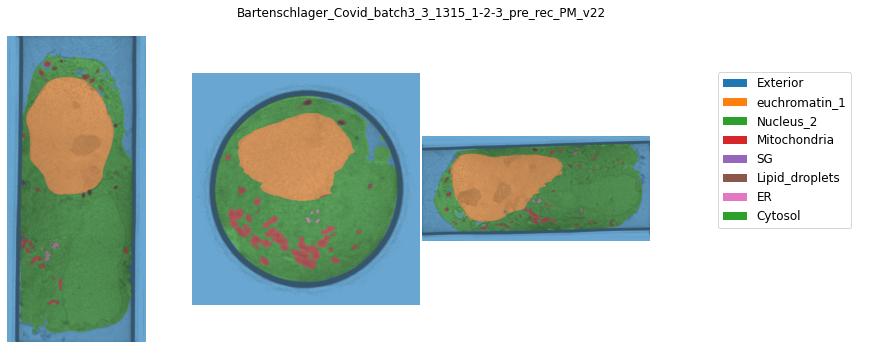

<IPython.core.display.Javascript object>

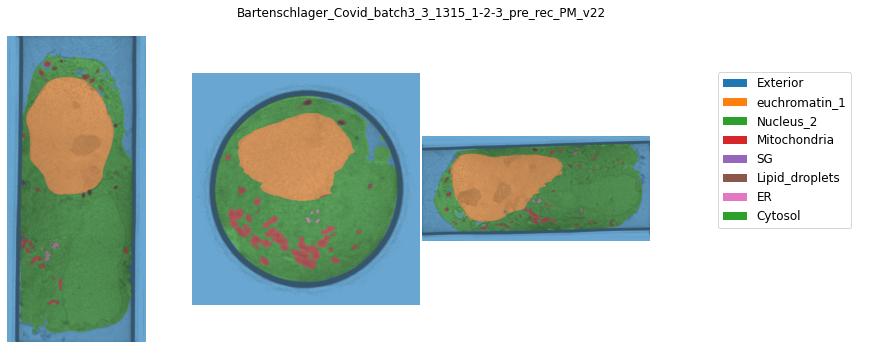

<IPython.core.display.Javascript object>

In [2]:
base = Path("C:/Users/axela/Documents/2021/covid/")
hx_files = [path for path in Path(base).rglob("*.hx")]
len(hx_files)

ncxtamira.AmiraCell.from_hx(hx_files[0]).preview()

Found 6 data and 2 labels
Found 6 data and 2 labels


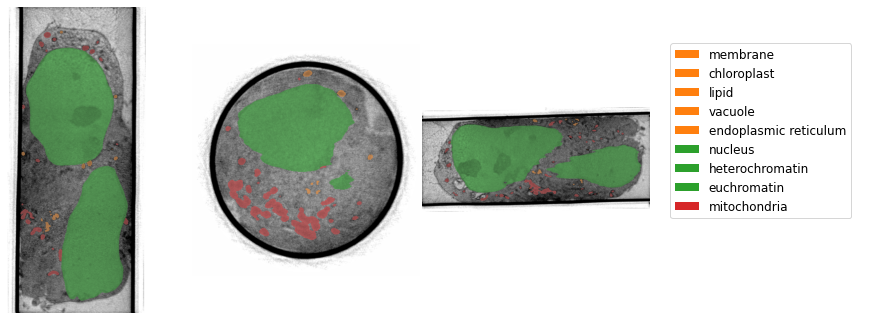

<IPython.core.display.Javascript object>

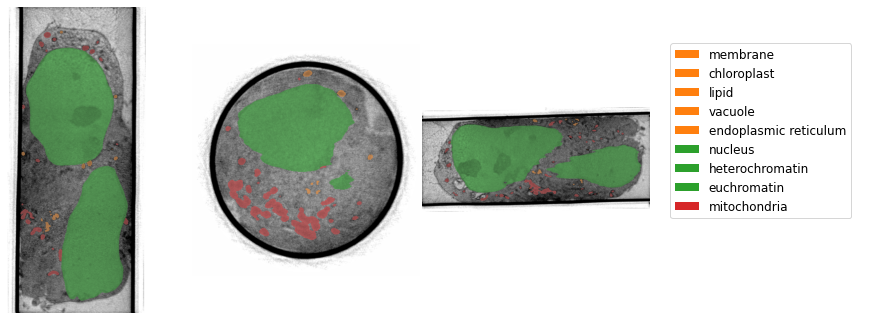

<IPython.core.display.Javascript object>

In [3]:
loader = AmiraLoaderOrganelle(
    hx_files, organelles=["cell", "nucleus", "mitochondria"], sanitize=True
)

item = loader._load_item(0)
cell = ncxtamira.AmiraCell(item["input"][0], item["target"], item["key"])
cell.preview()

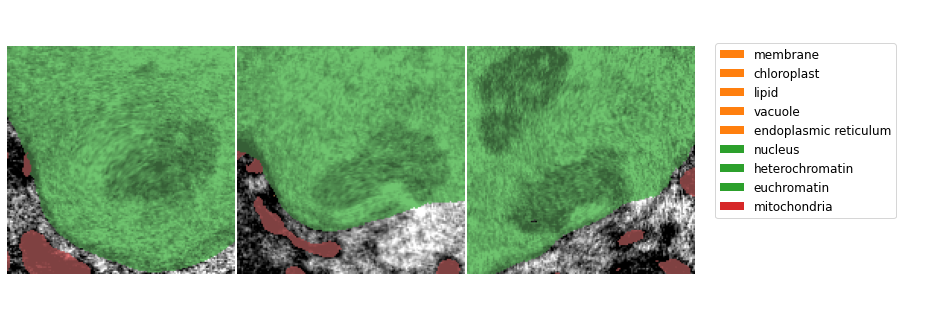

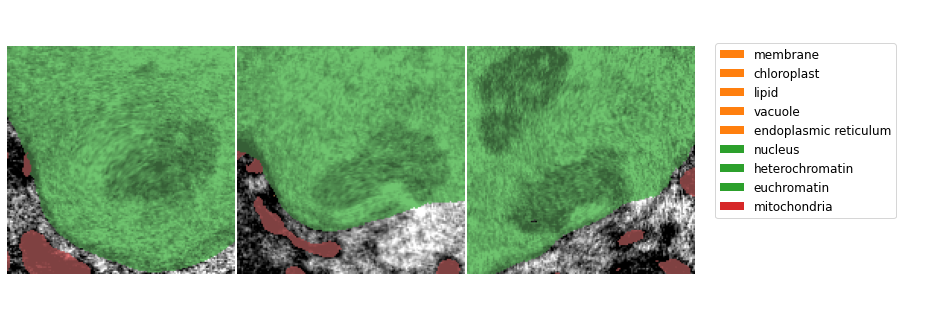

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
item_roi = {
    "input": item["input"][:, 250:400, 350:500, 150:300],
    "target": item["target"][250:400, 350:500, 150:300],
    "key": item["key"],
}

from ncxt_sxtcnn.sxtcnn.augment import ElasticDeformation

eld = ElasticDeformation(sigma=10)
x_out = eld.deform(item_roi["input"], order=3)
y_out = eld.deform(item_roi["target"], order=0)

cell = ncxtamira.AmiraCell(x_out[0], y_out, item_out["key"])
cell.preview()

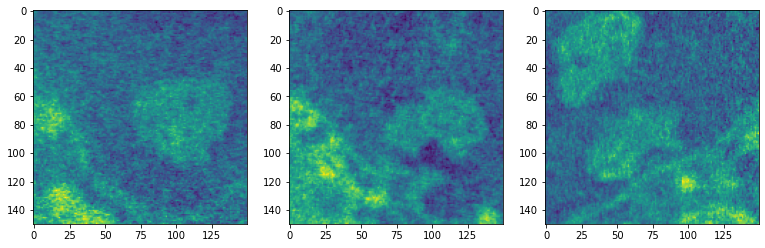

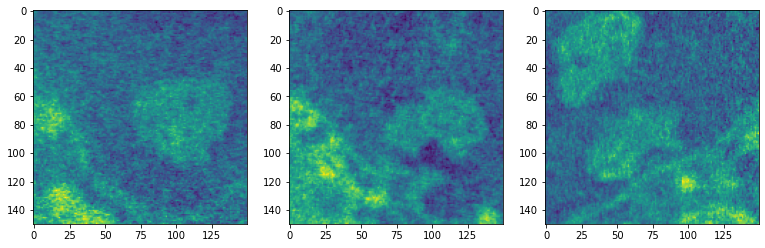

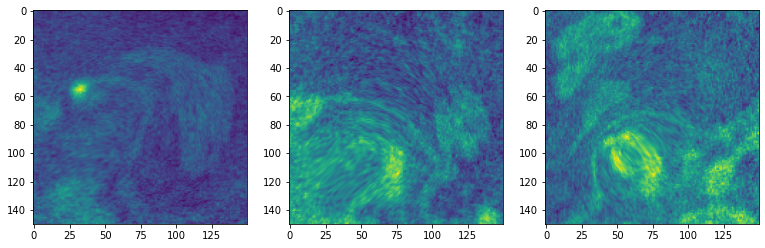

<IPython.core.display.Javascript object>

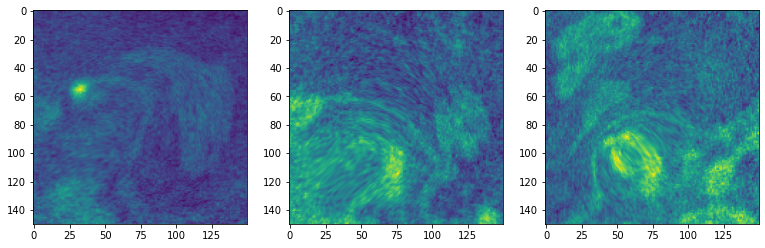

<IPython.core.display.Javascript object>

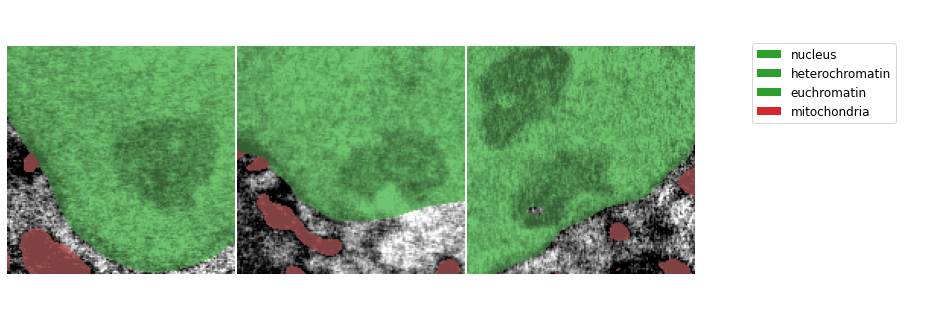

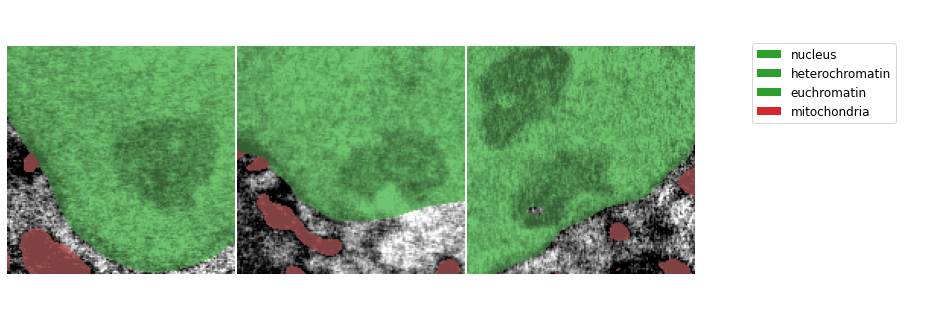

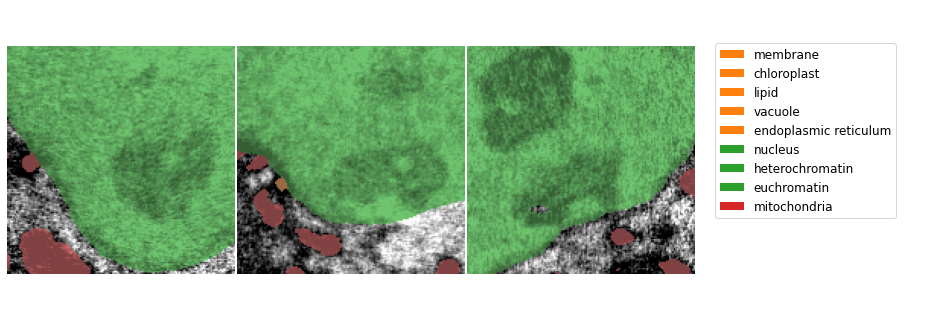

<IPython.core.display.Javascript object>

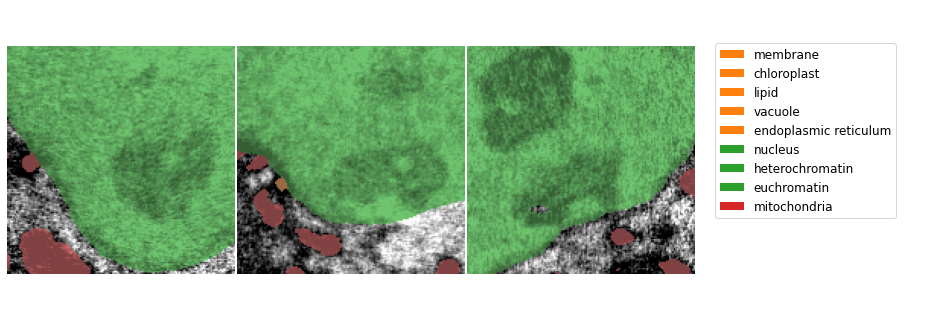

<IPython.core.display.Javascript object>

In [18]:
from ncxt_sxtcnn.sxtcnn.processors import elastic_transform_3d

item_out = elastic_transform_3d(item_roi, sigma=5)

cell = ncxtamira.AmiraCell(item_roi["input"][0], item_roi["target"], item_roi["key"])
cell.preview()

cell = ncxtamira.AmiraCell(item_out["input"][0], item_out["target"], item_out["key"])
cell.preview()

In [3]:
organelles = ["membrane", "nucleus", "symbiont", 'chloroplast','mitochondria']
wd = 'C:/Users/Axel Ekman/Documents/2022/cnn/'


In [8]:
model_args= {"instancenorm": True, "depth": 5, "start_filts":30}
loader_args = {"sanitize": True,'working_directory':Path(wd) / 'test'}
processor_args = {"block_shape": [128, 128, 128], "binning": 2, "n_blocks": 2}
settings = {"maximum_iterations": 100,'max_batch_size':2}

pipe = NCXTPipe(
        folder=base,
        working_directory=wd,
        labels=organelles,
        fold=3,
        criterion=CrossEntropyLoss_DiceLoss,
        processor_args=processor_args,
        model_args=     model_args,
        loader_args =loader_args,
        settings=settings,
    )
pipe.setup()
print(pipe.sxtcnn.model_size)

Files 15 + 0
tensor(9916.5664)


In [12]:
model_args= {"instancenorm": True, "depth": 5, "start_filts":64}
loader_args = {"sanitize": True,'working_directory':Path(wd) / 'test'}
processor_args = {"block_shape": [96, 96, 96], "binning": 2, "n_blocks": 2}
settings = {"maximum_iterations": 100,'max_batch_size':2}

pipe = NCXTPipe(
        folder=base,
        working_directory=wd,
        labels=organelles,
        fold=3,
        criterion=CrossEntropyLoss_DiceLoss,
        processor_args=processor_args,
        model_args=     model_args,
        loader_args =loader_args,
        settings=settings,
    )
pipe.setup()
print(pipe.sxtcnn.model_size)

Files 15 + 0
tensor(9151.5029)


Loading state 100 with last weights


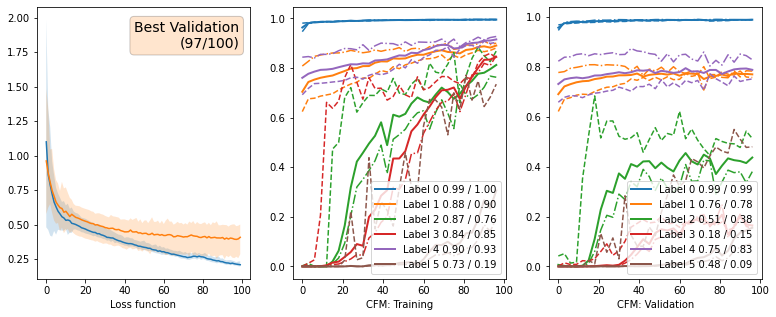

In [9]:
pipe.plot_train()

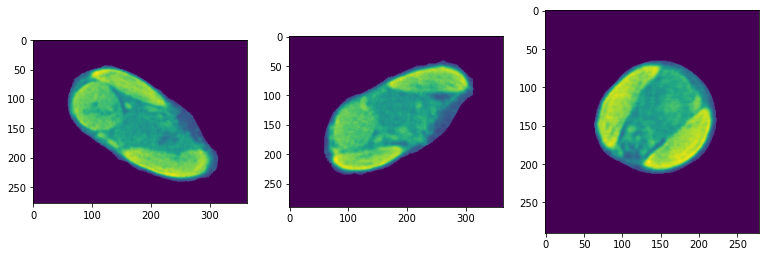

In [37]:
loader = pipe.loader
ncxtutils.volshow(loader[0]['input'][0])

In [79]:
from tqdm.auto import trange